In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/mitbih_train.csv', header = None)
test_data = pd.read_csv('/content/drive/MyDrive/mitbih_test.csv', header = None)

In [ ]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [ ]:
train_data.shape, test_data.shape

((87554, 188), (21892, 188))

In [ ]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
print(train_data.isnull().sum())

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


In [ ]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [ ]:
test_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,...,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000
mean,0.894410,0.761902,0.426627,0.221596,0.201676,0.209891,0.204805,0.200992,0.197634,0.196022,...,0.004588,0.004327,0.004020,0.003789,0.003638,0.003459,0.003166,0.003000,0.002946,0.473689
std,0.234560,0.218659,0.228572,0.208711,0.177727,0.172194,0.177946,0.176142,0.170228,0.166707,...,0.043128,0.042187,0.040255,0.039397,0.038535,0.037717,0.035903,0.035522,0.035266,1.143447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.924260,0.683366,0.251197,0.050505,0.082873,0.087912,0.072663,0.065997,0.064516,0.068493,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.990431,0.828996,0.432777,0.167630,0.147642,0.158111,0.144068,0.144509,0.150422,0.149029,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.912319,0.583991,0.347092,0.259211,0.287356,0.298453,0.294563,0.289907,0.282956,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.991429,...,0.980392,1.000000,0.966102,1.000000,1.000000,1.000000,1.000000,0.996053,1.000000,4.000000


In [ ]:
test_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [ ]:
train_data[187].astype(int).value_counts()


187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

In [ ]:
train_data[187].unique()

array([0., 1., 2., 3., 4.])

In [ ]:
# change classes label to string labels
class_mapping = {
    0: "Normal beats",
    1: "Supraventrical ectopic beats",
    2: "Ventricular ectopic beats",
    3: "Fusion beats",
    4: "Unknown beats"
}
train_data[187] = train_data[187].map(class_mapping)
test_data[187] = test_data[187].map(class_mapping)



In [ ]:
train_data[187].value_counts()

187
Normal beats                    72471
Unknown beats                    6431
Ventricular ectopic beats        5788
Supraventrical ectopic beats     2223
Fusion beats                      641
Name: count, dtype: int64


#Handle imbalanced data

In [ ]:
from imblearn.over_sampling import SMOTE
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

In [ ]:
y_train_resampled.value_counts()

187
Normal beats                    72471
Supraventrical ectopic beats    72471
Ventricular ectopic beats       72471
Fusion beats                    72471
Unknown beats                   72471
Name: count, dtype: int64

In [ ]:
y_test_resampled.value_counts()

187
Normal beats                    18118
Supraventrical ectopic beats    18118
Ventricular ectopic beats       18118
Fusion beats                    18118
Unknown beats                   18118
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_resampled = scaler.transform(X_test_resampled)


In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_resampled, y_train_resampled)

In [ ]:
print('SVCModel Train Score is : ' , svc_model.score(X_train_resampled, y_train_resampled))
print('SVCModel Test Score is : ' , svc_model.score(X_test_resampled, y_test_resampled))

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)
print('Random Forest Classification Report:')
print(classification_report(y_test_resampled, rf.predict(X_test_resampled)))

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.99      0.86     18118
         1.0       0.99      0.83      0.90     18118
         2.0       0.95      0.95      0.95     18118
         3.0       0.98      0.85      0.91     18118
         4.0       1.00      0.98      0.99     18118

    accuracy                           0.92     90590
   macro avg       0.93      0.92      0.92     90590
weighted avg       0.93      0.92      0.92     90590



In [ ]:
print(' Train Score is : ' , rf.score(X_train_resampled, y_train_resampled))
print(' Test Score is : ' , rf.score(X_test_resampled, y_test_resampled))

 Train Score is :  1.0
 Test Score is :  0.9204768738271333


In [ ]:
y_pred = rf.predict(X_test_resampled)

Confusion Matrix is : 
 [[17998    67    34    11     8]
 [ 2988 15017    54    38    21]
 [  589    29 17273   198    29]
 [ 1875    21   876 15346     0]
 [  329    10    27     0 17752]]


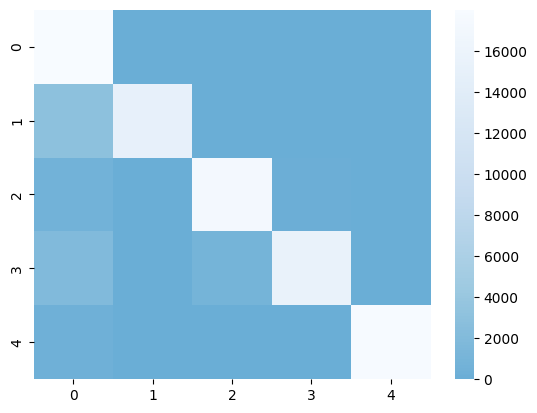

In [ ]:
CM = confusion_matrix(y_test_resampled, y_pred)
print('Confusion Matrix is : \n', CM)
# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()